In [47]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import KFold

from keras.utils.np_utils import to_categorical
from sklearn.multiclass import OneVsRestClassifier as ovrc
from sklearn.ensemble import RandomForestClassifier
import time

In [48]:
import theano

In [49]:
# class train_model

In [50]:
dftrain = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')
print dftrain.shape,  dftest.shape

(42000, 785) (28000, 784)


In [51]:
all_cols = dftrain.columns
feature_cols = all_cols[1:]
target_cols = all_cols[0]

In [82]:
X_train = dftrain[feature_cols]
y_train = dftrain[[target_cols]]
X_test = dftest[feature_cols]

In [53]:
# from sklearn import preprocessing
# lb = preprocessing.LabelBinarizer()
# lb.fit(y_train_0.values)
# # LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False) 
# lb.classes_
# y_train = pd.DataFrame(lb.transform(y_train_0.values))

In [54]:
# cols_to_retain = [ 'label' ]
# cat_dict = y_train[ cols_to_retain ].to_dict( orient = 'records' )
# from sklearn.feature_extraction import DictVectorizer as DV
# vectorizer = DV( sparse = False )
# y_train_cat = vectorizer.fit_transform(  cat_dict )

In [83]:
X_train = X_train.values.reshape((X_train.shape[0],28,28,1))
X_test = X_test.values.reshape((X_test.shape[0],28,28,1))

In [56]:
X_train[0].shape

(1, 28, 28)

In [58]:
X_train.shape

(42000, 1, 28, 28)

In [59]:
# from matplotlib import pyplot as plt

# plt.imshow(X_train[1])

In [61]:
np.max(X_train)

255

In [84]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [85]:
from keras.utils import np_utils

In [86]:
y_train = np_utils.to_categorical(y_train.values, 10)

In [67]:
# y_train = pd.DataFrame(to_categorical(y_train0.values))

In [68]:
import sklearn.preprocessing as skpp

In [69]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.utils import np_utils 

from keras.layers import Convolution2D, MaxPooling2D

In [79]:
from keras.preprocessing.image import ImageDataGenerator

In [97]:
to = time.time()
model = Sequential()
model.add(Convolution2D(64, 5, 5, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 1, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


hist = model.fit(X_train, y_train, 
          batch_size=32, nb_epoch=15, verbose=1)

# score = model.evaluate(X_test, Y_test, verbose=0)


Epoch 1/15
42000/42000 [==============================] - 192s - loss: 0.2293 - acc: 0.9280   
Epoch 2/15
42000/42000 [==============================] - 281s - loss: 0.0782 - acc: 0.9749   
Epoch 3/15
42000/42000 [==============================] - 255s - loss: 0.0565 - acc: 0.9821   
Epoch 4/15
42000/42000 [==============================] - 245s - loss: 0.0451 - acc: 0.9859   
Epoch 5/15
42000/42000 [==============================] - 187s - loss: 0.0355 - acc: 0.9887   
Epoch 6/15
42000/42000 [==============================] - 180s - loss: 0.0305 - acc: 0.9900   
Epoch 7/15
42000/42000 [==============================] - 174s - loss: 0.0257 - acc: 0.9913   
Epoch 8/15
42000/42000 [==============================] - 180s - loss: 0.0235 - acc: 0.9920   
Epoch 9/15
42000/42000 [==============================] - 175s - loss: 0.0197 - acc: 0.9933   
Epoch 10/15
42000/42000 [==============================] - 177s - loss: 0.0172 - acc: 0.9943   
Epoch 11/15
42000/42000 [========================

In [98]:
y_pred = model.predict_classes(X_test, batch_size=4)
# prob_matrix = model.predict_proba(Xtest, batch_size=10)

28000/28000 [==============================] - 110s   


In [115]:
# y_train


In [90]:
y_pred

array([2, 0, 9, ..., 3, 9, 2])

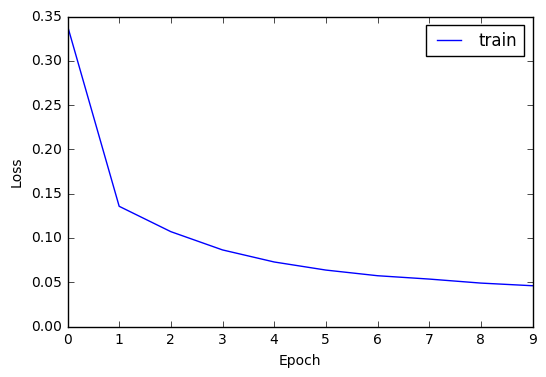

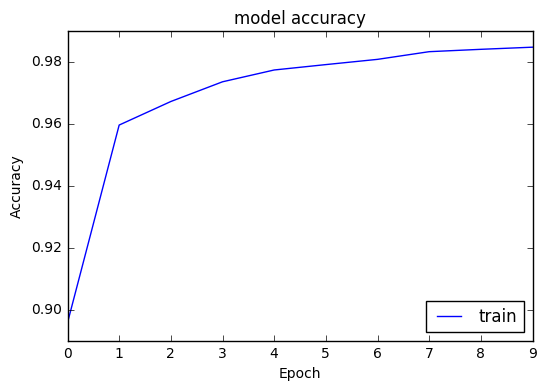

In [94]:
import matplotlib.pyplot as plt

# plt.figure(1)
y1 = hist.history['loss'][:]
# y2 = hist.history['val_loss'][:]
plt.plot(y1)
# plt.plot(y2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'],loc='upper right')
plt.show()

plt.plot(hist.history['acc'][:])
# plt.plot(hist.history['val_acc'][:])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


In [99]:

submission = pd.DataFrame({'ImageID':list(range(1,len(y_pred)+1)),"label":y_pred})
# submission['ImageId'] = np.arange(0,len(X_test))
submission.to_csv('submission_hjd.csv',index=False, header=True)